# Paper ST-Sloping - SMOTE 1000x Random Split Result Analysis

## Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['figure.facecolor'] = 'white'

## Load Results

In [2]:
random_split_4beat_df = pd.read_csv('result/bin_4beats_smote_1000x_random_split.csv', index_col=0)
random_split_6beat_df = pd.read_csv('result/bin_6beats_smote_1000x_random_split.csv', index_col=0)
random_split_8beat_df = pd.read_csv('result/bin_8beats_smote_1000x_random_split.csv', index_col=0)
random_split_10beat_df = pd.read_csv('result/bin_10beats_smote_1000x_random_split.csv', index_col=0)
random_split_16beat_df = pd.read_csv('result/bin_16beats_smote_1000x_random_split.csv', index_col=0)
random_split_32beat_df = pd.read_csv('result/bin_32beats_smote_1000x_random_split.csv', index_col=0)
random_split_64beat_df = pd.read_csv('result/bin_64beats_smote_1000x_random_split.csv', index_col=0)

In [3]:
sec_array = ["4beats", "6beats", "8beats", "10beats", "16beats", "32beats", "64beats"]
random_split_array = [
    random_split_4beat_df,
    random_split_6beat_df, random_split_8beat_df,
    random_split_10beat_df, random_split_16beat_df,
    random_split_32beat_df, random_split_64beat_df
]

## Preview

In [4]:
random_split_10beat_df.head(3)

,accuracy,specificity,precision,recall,f1
0,0.931517,0.880704,0.931638,0.931517,0.931576
1,0.932248,0.870504,0.931780,0.932248,0.931980
2,0.933528,0.879472,0.933466,0.933528,0.933497


## Processing

In [5]:
df_accuracy = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_accuracy[sec] =          df['accuracy']

df_specificity = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_specificity[sec] =       df['specificity']

df_precision = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_precision[sec] =         df['precision']

df_recall = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_recall[sec] =            df['recall']

df_f1 = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_f1[sec] =                df['f1']

metrics = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    row = dict()
    row['aaa_name'] = sec
    row['acc_avg'] =                 df["accuracy"].mean()
    row['acc_sd'] =                  df["accuracy"].std()
    row['specificity_avg'] =         df["specificity"].mean()
    row['specificity_sd'] =          df["specificity"].std()
    row['precision_avg'] =           df["precision"].mean()
    row['precision_sd'] =            df["precision"].std()
    row['recall_avg'] =              df["recall"].mean()
    row['recall_sd'] =               df["recall"].std()
    row['f1_avg'] =                  df["f1"].mean()
    row['f1_sd'] =                   df["f1"].std()
    metrics = metrics.append(row, ignore_index=True)

## Box plot table

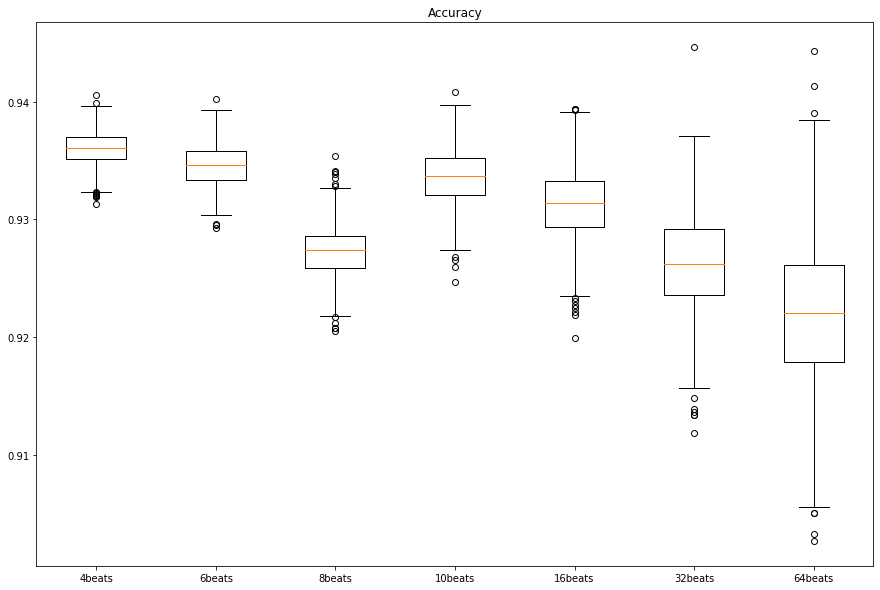

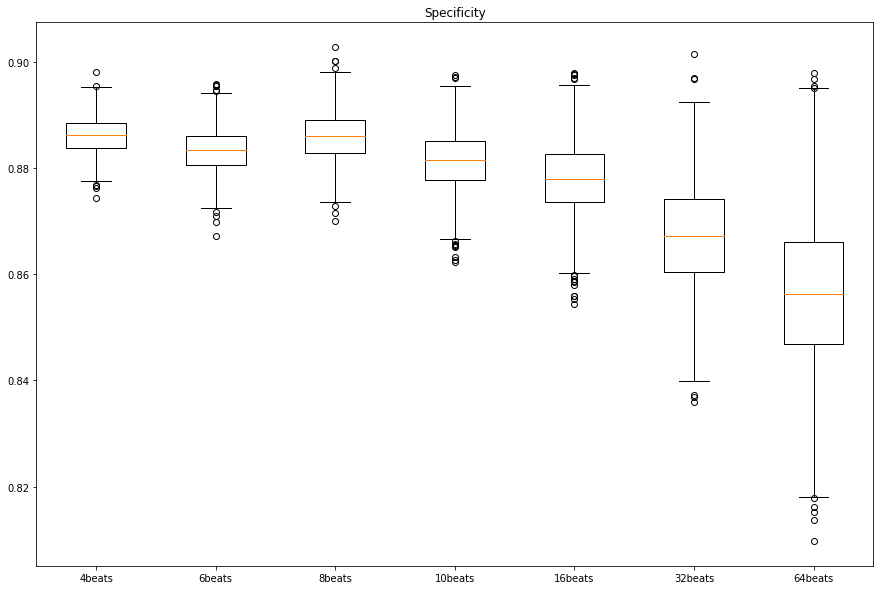

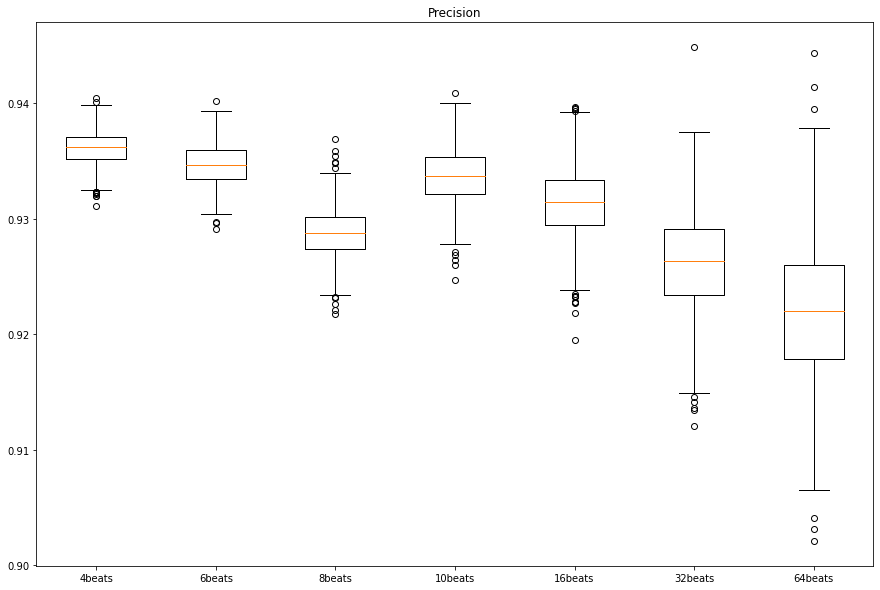

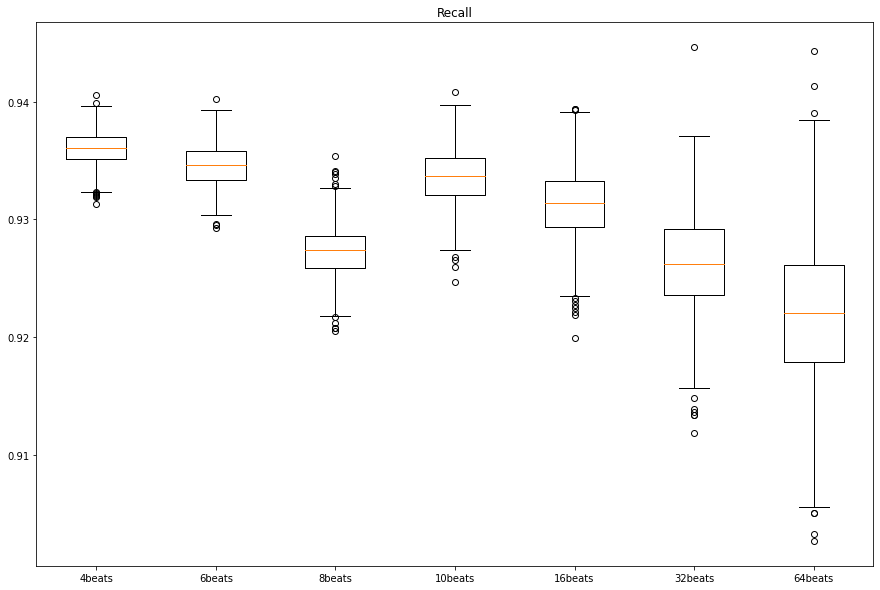

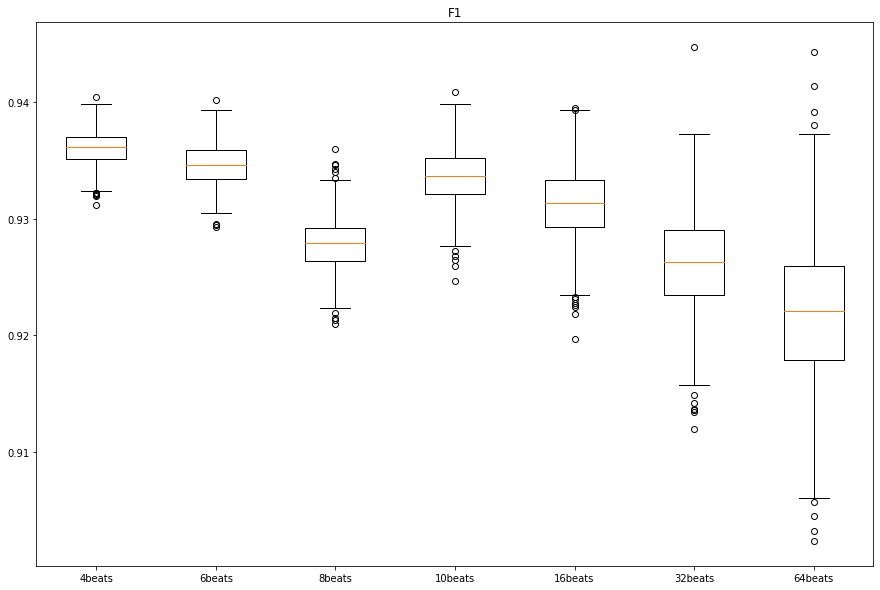

In [6]:
plt.boxplot(x=df_accuracy, labels=df_accuracy.columns)
plt.title("Accuracy")
plt.show()

plt.boxplot(x=df_specificity, labels=df_specificity.columns)
plt.title("Specificity")
plt.show()

plt.boxplot(x=df_precision, labels=df_precision.columns)
plt.title("Precision")
plt.show()

plt.boxplot(x=df_recall, labels=df_recall.columns)
plt.title("Recall")
plt.show()

plt.boxplot(x=df_f1, labels=df_f1.columns)
plt.title("F1")
plt.show()

## Summary table

In [7]:
metrics.to_csv("result_aggregate/aggregate_result_bin_smote_1000x_random_split.csv")
metrics.head(10)

,aaa_name,acc_avg,acc_sd,specificity_avg,specificity_sd,precision_avg,precision_sd,recall_avg,recall_sd,f1_avg,f1_sd
0,4beats,0.936068,0.001416,0.886155,0.003372,0.936148,0.001428,0.936068,0.001416,0.936104,0.001420
1,6beats,0.934635,0.001741,0.883313,0.004082,0.934693,0.001754,0.934635,0.001741,0.934659,0.001745
2,8beats,0.927269,0.002115,0.886022,0.004624,0.928764,0.002067,0.927269,0.002115,0.927859,0.002086
3,10beats,0.933645,0.002268,0.881331,0.005554,0.933694,0.002289,0.933645,0.002268,0.933661,0.002275
4,16beats,0.931311,0.002994,0.877917,0.006972,0.931448,0.003011,0.931311,0.002994,0.931365,0.002996
5,32beats,0.926272,0.004098,0.867076,0.009884,0.926290,0.004115,0.926272,0.004098,0.926249,0.004098
6,64beats,0.922057,0.006109,0.856288,0.014302,0.921891,0.006186,0.922057,0.006109,0.921902,0.006145


## Summary table mean only

In [8]:
metrics_mean_only = metrics[["aaa_name", "acc_avg", "specificity_avg", "precision_avg", "recall_avg", "f1_avg"]]
metrics_mean_only.to_csv("result_aggregate/aggregate_mean_only_result_bin_smote_1000x_random_split.csv", sep=";")
metrics_mean_only.head(10)

,aaa_name,acc_avg,specificity_avg,precision_avg,recall_avg,f1_avg
0,4beats,0.936068,0.886155,0.936148,0.936068,0.936104
1,6beats,0.934635,0.883313,0.934693,0.934635,0.934659
2,8beats,0.927269,0.886022,0.928764,0.927269,0.927859
3,10beats,0.933645,0.881331,0.933694,0.933645,0.933661
4,16beats,0.931311,0.877917,0.931448,0.931311,0.931365
5,32beats,0.926272,0.867076,0.926290,0.926272,0.926249
6,64beats,0.922057,0.856288,0.921891,0.922057,0.921902
